<a href="https://colab.research.google.com/github/Viny2030/UMSA-Analisis_de_datos/blob/main/pd_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

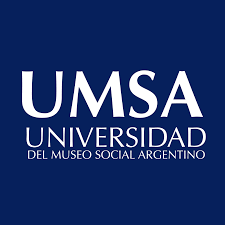


![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/250px-Pandas_logo.svg.png)

[Graficos de Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)

## **Instalando módulos necesarios**

In [1]:
!pip install yfinance

## **Módulos necesarios**

### ***Para análisis de datos***

In [2]:
import pandas as pd
import numpy as np

### ***Para acceso remotos de datos***

In [3]:
import yfinance as yf

## **Obtención de datos**

In [15]:
datos = "https://raw.githubusercontent.com/Viny2030/UMSA-Analisis_de_datos/refs/heads/main/Analisis_de_Facturas_de_Venta.csv"
df = pd.read_csv(datos)
df["FECHA"] = pd.to_datetime(df.FECHA)
df.drop(columns=["DOCUMENTO","TIPOFACTURA","PRECIO", "CANTIDAD"], inplace=True)
df = df[df.MONEDA == "Pesos Argentinos"]
df

<ipython-input-15-574258a50f8a>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["FECHA"] = pd.to_datetime(df.FECHA)


,ORGANIZACION,FECHA,PRODUCTO,IMPORTEMONTRANSACCION,MONEDA
0,Etigand S.A.,2019-12-27,Consultoria Web,289256.20,Pesos Argentinos
1,Javier Moroni,2019-12-21,Honorarios,99586.78,Pesos Argentinos
2,Amazon Group,2019-10-12,Parlantes para PC,59700.00,Pesos Argentinos
3,Amazon Group,2019-06-12,Mercaderia de Reventa,310740.00,Pesos Argentinos
4,Manganello S.R.L,2019-11-20,Consultoria Web,315000.00,Pesos Argentinos
...,...,...,...,...,...
154,Hernandez S.A.,2018-01-31,Dise–o Web,31500.00,Pesos Argentinos
155,Etigand S.A.,2018-01-25,Impresora Multifuncion,28429.75,Pesos Argentinos
156,Etigand S.A.,2018-01-25,Monitores,26446.28,Pesos Argentinos
157,Ferrari Hnos S.A.,2018-01-01,Impresora Multifuncion,35537.19,Pesos Argentinos


In [5]:
df = df.sort_values(by="FECHA", ascending=True)
df = df.reset_index(drop=True)
df

,ORGANIZACION,FECHA,PRODUCTO,IMPORTEMONTRANSACCION,MONEDA
0,Ferrari Hnos S.A.,2018-01-01,Monitores,26446.28,Pesos Argentinos
1,Ferrari Hnos S.A.,2018-01-01,Impresora Multifuncion,35537.19,Pesos Argentinos
2,Donadelli S.R.L,2018-01-03,Publicidad y Marketing,65000.00,Pesos Argentinos
3,Berker S.R.L,2018-01-05,Consultoria Web,15000.00,Pesos Argentinos
4,Javier Moroni,2018-01-06,Dise–o Web,13223.14,Pesos Argentinos
...,...,...,...,...,...
152,Galardon S.A.,2019-11-17,Impresora Multifuncion,234807.00,Pesos Argentinos
153,Manganello S.R.L,2019-11-20,Consultoria Web,315000.00,Pesos Argentinos
154,Nicolasen y Asociados S.A.,2019-12-04,Mercaderia de Reventa,51475.00,Pesos Argentinos
155,Javier Moroni,2019-12-21,Honorarios,99586.78,Pesos Argentinos


## **Agrupación**

La agrupación es un proceso que posee algunos de los siguientes pasos:

- **Dividir** en grupos basados en algún criterio.
- **Aplicar** una función a cada grupo en forma independiente.
- **Combinar** los resultados en una estructura de datos, como el DataFrame.

In [6]:
clientes = df.groupby("ORGANIZACION").count()
clientes

,FECHA,PRODUCTO,IMPORTEMONTRANSACCION,MONEDA
ORGANIZACION,,,,
Amazon Group,13,13,13,13
Berker S.R.L,7,7,7,7
Campomas S.A.,7,7,7,7
Donadelli S.R.L,6,6,6,6
Etigand S.A.,9,9,9,9
Ferrari Hnos S.A.,5,5,5,5
Galardon S.A.,7,7,7,7
Hernandez S.A.,14,14,14,14
Horacio Aguirre,1,1,1,1


In [7]:
dicc = df.groupby("ORGANIZACION").groups
dicc

{'Amazon Group': [31, 32, 57, 58, 59, 68, 90, 91, 92, 110, 122, 143, 147], 'Berker S.R.L': [3, 12, 71, 113, 114, 115, 126], 'Campomas S.A.': [66, 109, 117, 121, 136, 137, 140], 'Donadelli S.R.L': [2, 40, 49, 54, 62, 103], 'Etigand S.A.': [9, 10, 27, 39, 50, 63, 69, 133, 156], 'Ferrari Hnos S.A.': [0, 1, 23, 120, 128], 'Galardon S.A.': [7, 26, 29, 38, 52, 145, 152], 'Hernandez S.A.': [11, 13, 33, 35, 48, 55, 60, 78, 95, 97, 100, 108, 118, 124], 'Horacio Aguirre': [79], 'Horizonte S.A.': [14, 70, 98, 104, 111], 'Ignition S.A.C.I': [15, 16, 53, 76, 77, 80, 125], 'Jameson SRL': [17, 25, 65, 96, 116, 130, 149], 'Javier Moroni': [4, 5, 6, 21, 28, 41, 46, 61, 82, 86, 93, 101, 112, 134, 151, 155], 'Juan Fernández': [138, 141, 148], 'Juan Lopez': [135, 144], 'Klarkson': [67, 99, 105, 131, 150], 'Manganello S.R.L': [30, 42, 43, 44, 47, 56, 72, 87, 88, 94, 102, 106, 123, 129, 142, 153], 'Nicolasen y Asociados S.A.': [8, 18, 22, 24, 45, 51, 64, 81, 83, 84, 85, 89, 119, 127, 132, 139, 146, 154], 'R

In [8]:
dicc.keys()

dict_keys(['Amazon Group', 'Berker S.R.L', 'Campomas S.A.', 'Donadelli S.R.L', 'Etigand S.A.', 'Ferrari Hnos S.A.', 'Galardon S.A.', 'Hernandez S.A.', 'Horacio Aguirre', 'Horizonte S.A.', 'Ignition S.A.C.I', 'Jameson SRL', 'Javier Moroni', 'Juan Fernández', 'Juan Lopez', 'Klarkson', 'Manganello S.R.L', 'Nicolasen y Asociados S.A.', 'Rodrigo Vidal', 'Valeria Welponer'])

## **Obtención de datos financieros**

In [18]:
btc_enero = yf.download("BTC-USD", start="2024-01-01", end="2024-02-01").round(2)
# Replace 'Adj Close' with 'Close' in the drop function
btc_enero.drop(columns=["Volume", "Close"], inplace=True)
btc_enero.head()

[*********************100%***********************]  1 of 1 completed


Price,High,Low,Open
Ticker,BTC-USD,BTC-USD,BTC-USD
Date,,,
2024-01-01,44175.44,42214.98,42280.23
2024-01-02,45899.71,44176.95,44187.14
2024-01-03,45503.24,40813.54,44961.60
2024-01-04,44770.02,42675.18,42855.82
2024-01-05,44353.29,42784.72,44192.98


In [19]:
btc_enero.shape

(31, 3)

In [21]:
btc_febrero = yf.download("BTC-USD", start="2024-02-01", end="2024-03-01").round(2)
btc_febrero.drop(columns=["Volume","Close"], inplace=True)
btc_febrero.head()

[*********************100%***********************]  1 of 1 completed


Price,High,Low,Open
Ticker,BTC-USD,BTC-USD,BTC-USD
Date,,,
2024-02-01,43243.17,41879.19,42569.76
2024-02-02,43422.49,42584.34,43077.64
2024-02-03,43359.94,42890.81,43184.96
2024-02-04,43097.64,42374.83,42994.94
2024-02-05,43494.25,42264.82,42577.62


In [22]:
btc_febrero.shape

(29, 3)

In [23]:
btc_marzo = yf.download("BTC-USD", start="2024-03-01", end="2024-04-01").round(2)
btc_marzo.drop(columns=["Volume","Close"], inplace=True)
btc_marzo.head()

[*********************100%***********************]  1 of 1 completed


Price,High,Low,Open
Ticker,BTC-USD,BTC-USD,BTC-USD
Date,,,
2024-03-01,63155.10,60802.53,61168.06
2024-03-02,62458.70,61657.29,62431.65
2024-03-03,63230.21,61435.02,62031.58
2024-03-04,68537.03,62386.52,63137.00
2024-03-05,69170.62,59323.91,68341.05


In [ ]:
btc_marzo.shape

(31, 4)

## **Concatenación**

In [24]:
btc = [btc_enero, btc_febrero, btc_marzo]

In [25]:
bitcoin = pd.concat(btc)

In [26]:
bitcoin

Price,High,Low,Open
Ticker,BTC-USD,BTC-USD,BTC-USD
Date,,,
2024-01-01,44175.44,42214.98,42280.23
2024-01-02,45899.71,44176.95,44187.14
2024-01-03,45503.24,40813.54,44961.60
2024-01-04,44770.02,42675.18,42855.82
2024-01-05,44353.29,42784.72,44192.98
...,...,...,...
2024-03-27,71727.69,68381.93,69991.90
2024-03-28,71546.02,68895.51,69452.77


##**Duplicados**

In [27]:
btc_enero.tail()

Price,High,Low,Open
Ticker,BTC-USD,BTC-USD,BTC-USD
Date,,,
2024-01-27,42195.63,41431.28,41815.62
2024-01-28,42797.18,41696.91,42126.12
2024-01-29,43305.87,41818.33,42030.91
2024-01-30,43838.95,42711.37,43300.23
2024-01-31,43717.41,42298.95,42946.25


In [28]:
btc_febrero.head()

Price,High,Low,Open
Ticker,BTC-USD,BTC-USD,BTC-USD
Date,,,
2024-02-01,43243.17,41879.19,42569.76
2024-02-02,43422.49,42584.34,43077.64
2024-02-03,43359.94,42890.81,43184.96
2024-02-04,43097.64,42374.83,42994.94
2024-02-05,43494.25,42264.82,42577.62


In [29]:
btc_febrero.tail()

Price,High,Low,Open
Ticker,BTC-USD,BTC-USD,BTC-USD
Date,,,
2024-02-25,51950.03,51306.17,51565.21
2024-02-26,54938.18,50931.03,51730.54
2024-02-27,57537.84,54484.20,54519.36
2024-02-28,63913.13,56738.43,57071.10
2024-02-29,63585.64,60498.73,62499.18


In [30]:
btc_marzo.head()

Price,High,Low,Open
Ticker,BTC-USD,BTC-USD,BTC-USD
Date,,,
2024-03-01,63155.10,60802.53,61168.06
2024-03-02,62458.70,61657.29,62431.65
2024-03-03,63230.21,61435.02,62031.58
2024-03-04,68537.03,62386.52,63137.00
2024-03-05,69170.62,59323.91,68341.05


In [31]:
bitcoin.drop_duplicates()

Price,High,Low,Open
Ticker,BTC-USD,BTC-USD,BTC-USD
Date,,,
2024-01-01,44175.44,42214.98,42280.23
2024-01-02,45899.71,44176.95,44187.14
2024-01-03,45503.24,40813.54,44961.60
2024-01-04,44770.02,42675.18,42855.82
2024-01-05,44353.29,42784.72,44192.98
...,...,...,...
2024-03-27,71727.69,68381.93,69991.90
2024-03-28,71546.02,68895.51,69452.77


##**Función ```apply()```**

<p align=justify><b><font color="RoyalBlue">🐼 Pandas proporciona un método para la clase Dataframe el cual aplica una función a lo largo un eje del Dataframe, esto es, a lo largo de cada fila o columna. Método que básicamente tiene la siguiente forma. </font></b></p>

```python
df.apply(func, axis=0, args=())
```


**<font color="RoyalBlue">En donde df es un objeto DataFrame y los parámetros son:**

- **func**: Función que se aplicará a cada columna o fila. La cual debe aceptar una serie y devuelve una serie.
- **axis**: Eje a lo largo del cual se aplica la función en el conjunto de datos. Al seleccionarse el valor 0, valor que está por defecto, la función se aplica a las columnas, mientras que si se selecciona 1 se aplicará a las filas.
- **args**: Argumentos adicionales para la función.


In [34]:
dolar_blue = 980

In [33]:
bitcoin

Price,High,Low,Open
Ticker,BTC-USD,BTC-USD,BTC-USD
Date,,,
2024-01-01,44175.44,42214.98,42280.23
2024-01-02,45899.71,44176.95,44187.14
2024-01-03,45503.24,40813.54,44961.60
2024-01-04,44770.02,42675.18,42855.82
2024-01-05,44353.29,42784.72,44192.98
...,...,...,...
2024-03-27,71727.69,68381.93,69991.90
2024-03-28,71546.02,68895.51,69452.77


In [35]:
def conversion(x):
  return x * dolar_blue

>**<font color="RoyalBlue">Convertimos los valores del dataframe a pesos...**


In [36]:
bitcoin.apply(conversion)

Price,High,Low,Open
Ticker,BTC-USD,BTC-USD,BTC-USD
Date,,,
2024-01-01,43291931.2,41370680.4,41434625.4
2024-01-02,44981715.8,43293411.0,43303397.2
2024-01-03,44593175.2,39997269.2,44062368.0
2024-01-04,43874619.6,41821676.4,41998703.6
2024-01-05,43466224.2,41929025.6,43309120.4
...,...,...,...
2024-03-27,70293136.2,67014291.4,68592062.0
2024-03-28,70115099.6,67517599.8,68063714.6


In [37]:
bitcoin.apply(lambda x: x * dolar_blue)

Price,High,Low,Open
Ticker,BTC-USD,BTC-USD,BTC-USD
Date,,,
2024-01-01,43291931.2,41370680.4,41434625.4
2024-01-02,44981715.8,43293411.0,43303397.2
2024-01-03,44593175.2,39997269.2,44062368.0
2024-01-04,43874619.6,41821676.4,41998703.6
2024-01-05,43466224.2,41929025.6,43309120.4
...,...,...,...
2024-03-27,70293136.2,67014291.4,68592062.0
2024-03-28,70115099.6,67517599.8,68063714.6


>**<font color="RoyalBlue">Queremos saber el maximo valor para cada una de las columnas...**


In [38]:
bitcoin.apply(lambda x: x * dolar_blue).max()

,,0
Price,Ticker,
High,BTC-USD,72275068.6
Low,BTC-USD,69907408.2
Open,BTC-USD,71617792.4


**Hemos llegado al fin de este cuaderno, felicitaciones seguimos con Pandas, ahora a seguir en el proximo cuaderno...**